Matplotlib is building the font cache; this may take a moment.


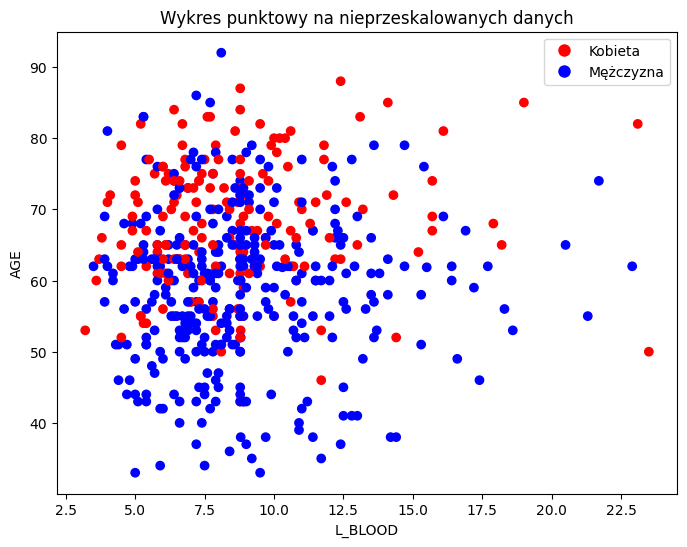

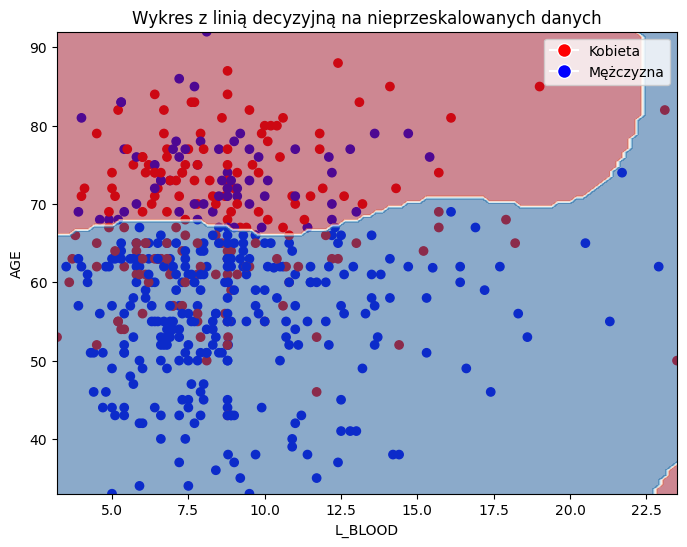

Dokładność modelu: 0.708
Macierz pomyłek
[[ 90  88]
 [ 61 271]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Wczytanie danych
df = pd.read_csv("myocardial infarction complications.csv")

# Sprawdzenie i uzupełnienie braków
df.fillna(df.mean(), inplace=True)

# Wybór dwóch cech do wykresu
X = df[["L_BLOOD", "AGE"]] # L_BLOOD na X, AGE na Y
y = df["SEX"]

# Podział na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Skalowanie tylko dla modelu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Skalowana wersja dla predykcji

# Trenowanie modelu SVM
model = SVC(kernel="rbf", C=1)
model.fit(X_train_scaled, y_train)

# Predykcja
y_pred = model.predict(X_test_scaled)

# Wizualizacja wykresu punktowego
colors = np.where(y_test == 0, 'r', 'b')
plt.figure(figsize=(8, 6))
plt.scatter(X_test["L_BLOOD"], X_test["AGE"], c=colors) # Oryginalne dane
plt.xlabel("L_BLOOD")
plt.ylabel("AGE")
plt.title("Wykres punktowy na nieprzeskalowanych danych")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Kobieta', markerfacecolor='r', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Mężczyzna', markerfacecolor='b', markersize=10)],
           loc='upper right')
plt.show()

import numpy as np

# Wykres z linią decyzyjną (również na nieprzeskalowanych danych)
plt.figure(figsize=(8,6))
plt.scatter(X_test["L_BLOOD"], X_test["AGE"], c=colors)

# Granice do siatki w oryginalnej skali
x_min, x_max = X_test["L_BLOOD"].min(), X_test["L_BLOOD"].max()
y_min, y_max = X_test["AGE"].min(), X_test["AGE"]. max()

# Słatka w oryginalnej skali
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Skalowanie siatki przed predykcją
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(pd.DataFrame(grid_points, columns=X.columns))

# Predykcja na siatce
Z = model.predict(grid_points_scaled)
Z = Z.reshape(xx.shape)

# Wizualizacja Linii decyzyjnej
plt.contourf(xx, yy, Z, alpha=0.5, cmap='RdBu')
plt.xlabel("L_BLOOD")
plt.ylabel("AGE")
plt.title("Wykres z linią decyzyjną na nieprzeskalowanych danych")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Kobieta', markerfacecolor='r',
markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Mężczyzna', markerfacecolor='b',
markersize=10)],
        loc='upper right')
plt. show()

from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test_scaled)

# Ocena dokładności
print(f"Dokładność modelu: {accuracy_score(y_test, y_pred):.3f}")

# Macierz pomyłek
print("Macierz pomyłek")
print(confusion_matrix(y_test, y_pred))